<!--BOOK_INFORMATION-->
<img align="left" src="" style="width: 76px; height: 100px; background: white; border: 1px solid black; margin-right:10px;">
*This notebook contains an excerpt from the upcoming book Machine Learning for OpenCV by Michael Beyeler.
The code is released under the [MIT license](https://opensource.org/licenses/MIT),
and is available on [GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*Note that this excerpt contains only the raw code - the book is rich with additional explanations and illustrations.
If you find this content useful, please consider supporting the work by
[buying the book](https://github.com/mbeyeler/opencv-machine-learning)!*

<!--NAVIGATION-->
< [Using Decision Trees to Make a Medical Diagnosis](05.00-Using-Decision-Trees-to-Make-a-Medical-Diagnosis.ipynb) | [Contents](../README.md) | [Using Decision Trees to Diagnose Breast Cancer](05.02-Using-Decision-Trees-to-Diagnose-Breast-Cancer.ipynb) >

# Building your first decision tree

Let's consider the example where a number of patients have suffered from the same illness - such as a rare form of basorexia. Let's further assume that the true causes of the disease remain unknown to this day, and that all the information that is available to us consists of a bunch of physiological measurements. For example, we might have access to the following information:

- a patient's blood pressure ('BP'),
- a patient's cholesterol level ('cholesterol'),
- a patient's gender ('sex'),
- a patient's age ('age'),
- a patient's blood sodium concentration ('Na'), and
- a patient's blood potassium concentration ('K').

Based on all this information, let's suppose a doctor made recommendations for the patient to treat their disease using one of four possible drugs - drug A, B, C, or D. 

We have data available for 20 different patients:

In [1]:
data = [
    {'age': 33, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.66, 'K': 0.06, 'drug': 'A'},
    {'age': 77, 'sex': 'F', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.19, 'K': 0.03, 'drug': 'D'},
    {'age': 88, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.80, 'K': 0.05, 'drug': 'B'},
    {'age': 39, 'sex': 'F', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.19, 'K': 0.02, 'drug': 'C'},
    {'age': 43, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'high', 'Na': 0.36, 'K': 0.03, 'drug': 'D'},
    {'age': 82, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.09, 'K': 0.09, 'drug': 'C'},
    {'age': 40, 'sex': 'M', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.89, 'K': 0.02, 'drug': 'A'},
    {'age': 88, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.80, 'K': 0.05, 'drug': 'B'},
    {'age': 29, 'sex': 'F', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.35, 'K': 0.04, 'drug': 'D'},
    {'age': 53, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.54, 'K': 0.06, 'drug': 'C'},
    {'age': 36, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.53, 'K': 0.05, 'drug': 'A'},
    {'age': 63, 'sex': 'M', 'BP': 'low', 'cholesterol': 'high', 'Na': 0.86, 'K': 0.09, 'drug': 'B'},
    {'age': 60, 'sex': 'M', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.66, 'K': 0.04, 'drug': 'C'},
    {'age': 55, 'sex': 'M', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.82, 'K': 0.04, 'drug': 'B'},
    {'age': 35, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'high', 'Na': 0.27, 'K': 0.03, 'drug': 'D'},
    {'age': 23, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high', 'Na': 0.55, 'K': 0.08, 'drug': 'A'},
    {'age': 49, 'sex': 'F', 'BP': 'low', 'cholesterol': 'normal', 'Na': 0.27, 'K': 0.05, 'drug': 'C'},
    {'age': 27, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal', 'Na': 0.77, 'K': 0.02, 'drug': 'B'},
    {'age': 51, 'sex': 'F', 'BP': 'low', 'cholesterol': 'high', 'Na': 0.20, 'K': 0.02, 'drug': 'D'},
    {'age': 38, 'sex': 'M', 'BP': 'high', 'cholesterol': 'normal', 'Na': 0.78, 'K': 0.05, 'drug': 'A'}
]

## Understanding the task by understanding the data

What is always the first step in tackling a new machine learning problem?

You are absolutely right: to get a sense of the data. The better you understand the data, the better you understand the problem you are trying to solve.

The first thing to realize is that the 'drug' column is actually not a feature value like all the other columns. 

Thus, it would be a good idea to remove all 'drug' entries from the dictionaries listed in the 'data' variable and store them in a separate variable. For this we need to go through the list and extract the 'drug' entry, which is easiest to do with a list comprehension:

In [2]:
target = [d['drug'] for d in data]
target

['A',
 'D',
 'B',
 'C',
 'D',
 'C',
 'A',
 'B',
 'D',
 'C',
 'A',
 'B',
 'C',
 'B',
 'D',
 'A',
 'C',
 'B',
 'D',
 'A']

Then remove the 'drug' entry from all the dictionaries:

In [3]:
[d.pop('drug') for d in data];

Sweet! Now let's look at the data:

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [5]:
age = [d['age'] for d in data]
age

[33,
 77,
 88,
 39,
 43,
 82,
 40,
 88,
 29,
 53,
 36,
 63,
 60,
 55,
 35,
 23,
 49,
 27,
 51,
 38]

In [6]:
sodium = [d['Na'] for d in data]
potassium = [d['K'] for d in data]

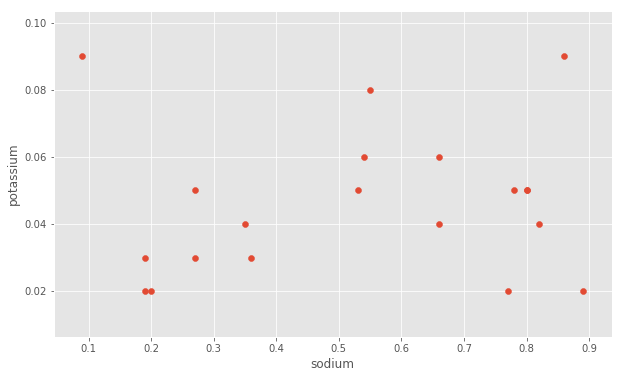

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(sodium, potassium)
plt.xlabel('sodium')
plt.ylabel('potassium')

But, what we really want is to color the data points according to their target labels:

In [8]:
target = [ord(t) - 65 for t in target]
target

[0, 3, 1, 2, 3, 2, 0, 1, 3, 2, 0, 1, 2, 1, 3, 0, 2, 1, 3, 0]

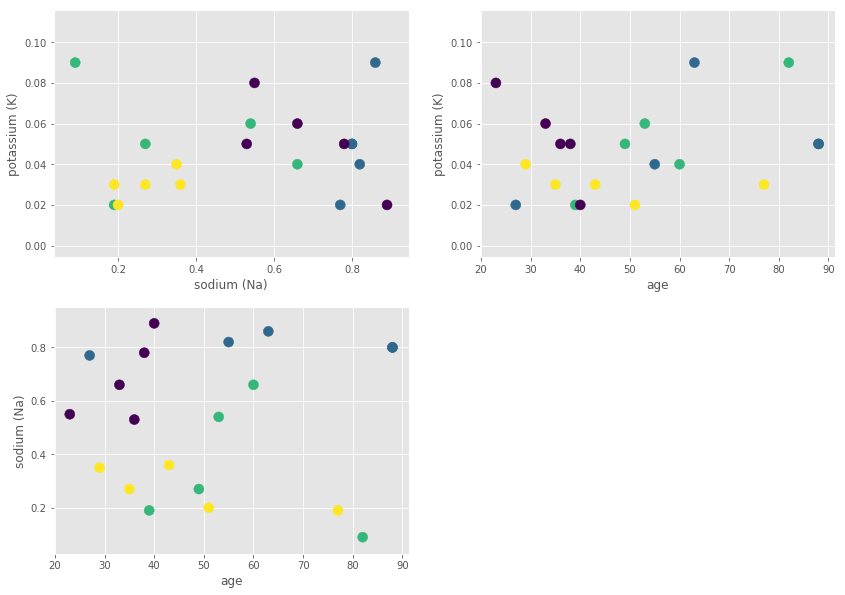

In [9]:
plt.figure(figsize=(14, 10))

plt.subplot(221)
plt.scatter([d['Na'] for d in data], [d['K'] for d in data],
            c=target, s=100)
plt.xlabel('sodium (Na)')
plt.ylabel('potassium (K)')

plt.subplot(222)
plt.scatter([d['age'] for d in data], [d['K'] for d in data],
            c=target, s=100)
plt.xlabel('age')
plt.ylabel('potassium (K)')

plt.subplot(223)
plt.scatter([d['age'] for d in data], [d['Na'] for d in data],
            c=target, s=100)
plt.xlabel('age')
plt.ylabel('sodium (Na)')
plt.savefig('all.png')

## Preprocessing the data

We need to convert all categorical features into numerical features:

In [10]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)
data_pre = vec.fit_transform(data)

In [11]:
vec.get_feature_names()

['BP=high',
 'BP=low',
 'BP=normal',
 'K',
 'Na',
 'age',
 'cholesterol=high',
 'cholesterol=normal',
 'sex=F',
 'sex=M']

In [12]:
data_pre[0]

array([  1.  ,   0.  ,   0.  ,   0.06,   0.66,  33.  ,   1.  ,   0.  ,
         1.  ,   0.  ])

Convert to 32-bit floating point numbers in order to make OpenCV happy:

In [13]:
import numpy as np
data_pre = np.array(data_pre, dtype=np.float32)
target = np.array(target, dtype=np.float32).reshape((-1, 1))

In [14]:
data_pre.shape, target.shape

((20, 10), (20, 1))

Then split data into training and test sets:

In [15]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(data_pre, target, test_size=5, random_state=42)

## Building the decision tree

Building the decision tree with OpenCV works in much the same way as in Chapter 3, First Steps in Supervised Learning. Recall that all machine learning function reside in OpenCV 3.1's ml module. You can create an empty decision tree using the following code:

In [16]:
import cv2
dtree = cv2.ml.DTrees_create()

Then train the model:

In [17]:
dtree.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

Predict some values:

In [18]:
y_pred = dtree.predict(X_test)

Calculate the score on the training and test sets:

In [19]:
from sklearn import metrics
metrics.accuracy_score(y_test, dtree.predict(X_test))

In [20]:
metrics.accuracy_score(y_train, dtree.predict(X_train))

## Visualizing a trained decision tree

OpenCV's implementation of decision trees is good enough if you are just starting out, and don't care too much what's going on under the hood. However, in the following sections we will switch to Scikit-Learn. Their implementation allows us to customize the algorithm and makes it a lot easier to investigate the inner workings of the tree. Their usage is also much better documented...

In [21]:
from sklearn import tree

In [22]:
dtc = tree.DecisionTreeClassifier()

The model is trained by calling `fit`:

In [23]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [24]:
dtc.score(X_train, y_train)

1.0

In [25]:
dtc.score(X_test, y_test)

0.40000000000000002

Now, here's the cool thing: If you want to know what the tree looks like, you can do so using GraphViz to create a PDF file (or any other supported file type) from the tree structure. For this to work, you need to install GraphViz first, which you can do from the command line using conda:

    $ conda install graphviz

In [26]:
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(dtc, out_file=f,
                            feature_names=vec.get_feature_names(),
                            class_names=['A', 'B', 'C', 'D'])

Then, back on the command line, you can use GraphViz to turn "tree.dot" into (for example) a PNG file:

    $ dot -Tpng tree.dot -o tree.png

## Rating the importance of features

Scikit-Learn provides a function to rate feature importance, which is a number between 0 and 1 for each feature, where 0 means "not used at all in any decisions made" and 1 means "perfectly predicts the target". The feature importances are normalized such that they all sum to 1:

In [27]:
dtc.feature_importances_

array([ 0.        ,  0.        ,  0.        ,  0.13554217,  0.29718876,
        0.24096386,  0.        ,  0.32630522,  0.        ,  0.        ])

If we remind ourselves of the feature names, it will become clear which features seem to be the most important. A plot might be most informative:

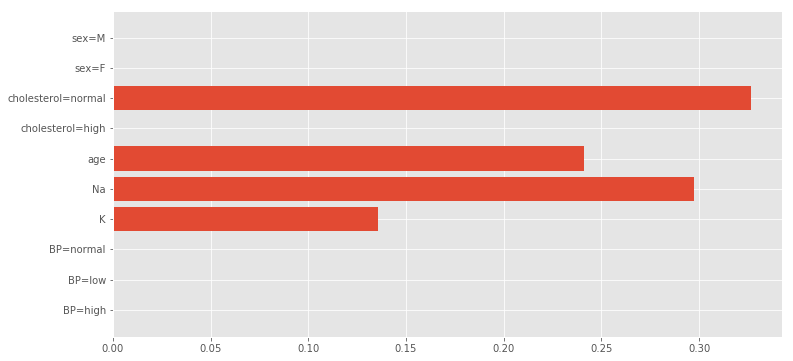

In [28]:
plt.figure(figsize=(12, 6))
plt.barh(range(10), dtc.feature_importances_, align='center', tick_label=vec.get_feature_names())
plt.savefig('feature_imp.png')

## Understanding decision rules

Two of the most commonly used criteria for making decisions are the following:

- `criterion='gini'`: The Gini impurity is a measure of misclassification, with the aim of minimizing the probability of misclassification.

- `criterion='entropy'`: In information theory, entropy is a measure of the amount of uncertainty associated with a signal or distribution.

In Scikit-Learn, you can specify the split criterion in the constructor of the decision tree call. For example, if you want to use entropy, you would type the following:

In [29]:
dtce = tree.DecisionTreeClassifier(criterion='entropy')

In [30]:
dtce.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [31]:
dtce.score(X_train, y_train)

1.0

In [32]:
dtce.score(X_test, y_test)

0.40000000000000002

In [33]:
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(dtce, out_file=f,
                            feature_names=vec.get_feature_names(),
                            class_names=['A', 'B', 'C', 'D'])

## Controlling the complexity of decision trees

There are two common ways to avoid overfitting:

- pre-pruning: This is the process of stopping the creation of the tree early.

- post-pruning (or just pruning): This is the process of first building the tree but then removing or collapsing nodes that contain only little information.


There are a number of ways to pre-prune a tree, all of which can be achieved by passing optional arguments to the `DecisionTreeClassifier` constructor:

- limiting the maximum depth of the tree via the `max_depth parameter`

- limiting the maximum number of leaf nodes via `max_leaf_nodes`

- requiring a minimum number of points in a node to keep splitting it via `min_samples_split`


In [34]:
dtc0 = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6)

In [35]:
dtc0.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=6, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
dtc0.score(X_train, y_train)

1.0

In [37]:
dtc0.score(X_test, y_test)

0.40000000000000002

<!--NAVIGATION-->
< [Using Decision Trees to Make a Medical Diagnosis](05.00-Using-Decision-Trees-to-Make-a-Medical-Diagnosis.ipynb) | [Contents](../README.md) | [Using Decision Trees to Diagnose Breast Cancer](05.02-Using-Decision-Trees-to-Diagnose-Breast-Cancer.ipynb) >